# Additional Readings
You can read the full description of project here:
https://medium.com/@Markeko/speech-emotion-recognition-with-convolutional-neural-network-ae5406a1c0f7

# Import libraries

In [1]:
#Import data packages
import os
import sys
import glob
import numpy as np
import pandas as pd

#Import audio packages
import librosa
import librosa.display
from scipy.io import wavfile
import scipy.io.wavfile
import sys

#Import plotting packages
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import matplotlib.pyplot as plt
import seaborn as sns

#Import Keras & Tensorflow packages
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

# Read Files

There are two databases that were used for this project:
- RAVDESS: The RAVDESS file contains a unique filename that consists in a 7-part numerical identifier.
- TESS: The TESS file contains a unique letter at beginning of file name to identify the emotion.

## Read RAVDESS Dataset

In [2]:
#Build list of files
# rawdata_list = os.listdir('RawData/')
rawdata_list = os.listdir(r"C:\Users\aholm\Documents\Data Science Bootcamp\Classwork\Project 4\Files\Actor_01\\")

In [3]:
#Review list of files
print(rawdata_list)

['03-01-01-01-01-01-01.wav', '03-01-01-01-01-02-01.wav', '03-01-01-01-02-01-01.wav', '03-01-01-01-02-02-01.wav', '03-01-02-01-01-01-01.wav', '03-01-02-01-01-02-01.wav', '03-01-02-01-02-01-01.wav', '03-01-02-01-02-02-01.wav', '03-01-02-02-01-01-01.wav', '03-01-02-02-01-02-01.wav', '03-01-02-02-02-01-01.wav', '03-01-02-02-02-02-01.wav', '03-01-03-01-01-01-01.wav', '03-01-03-01-01-02-01.wav', '03-01-03-01-02-01-01.wav', '03-01-03-01-02-02-01.wav', '03-01-03-02-01-01-01.wav', '03-01-03-02-01-02-01.wav', '03-01-03-02-02-01-01.wav', '03-01-03-02-02-02-01.wav', '03-01-04-01-01-01-01.wav', '03-01-04-01-01-02-01.wav', '03-01-04-01-02-01-01.wav', '03-01-04-01-02-02-01.wav', '03-01-04-02-01-01-01.wav', '03-01-04-02-01-02-01.wav', '03-01-04-02-02-01-01.wav', '03-01-04-02-02-02-01.wav', '03-01-05-01-01-01-01.wav', '03-01-05-01-01-02-01.wav', '03-01-05-01-02-01-01.wav', '03-01-05-01-02-02-01.wav', '03-01-05-02-01-01-01.wav', '03-01-05-02-01-02-01.wav', '03-01-05-02-02-01-01.wav', '03-01-05-02-02-02-

## LIbrosa & MFCC configuration
In order to analyze and standardize how each audio file feature was built, the following configurations were determined:

In [4]:
#sample feature
#librosa.core.load(path, sr=22050, mono=True, offset=0.0, duration=None, dtype=<class 'numpy.float32'>, res_type='kaiser_best')
res_type_s = 'kaiser_best'
duration_s = None
sample_rate_s = 22050
offset_s = 0.5

#Mfcc
#librosa.feature.mfcc(y=None, sr=22050, S=None, n_mfcc=20, dct_type=2, norm='ortho', lifter=0, **kwargs)
mfcc_sample_rate = 22050
n_mfcc = 40
axis_mfcc = 1

### RAVDESS get emotion features

File naming convention

Each of the 7356 RAVDESS files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 02-01-06-01-02-01-12.mp4). These identifiers define the stimulus characteristics: 

Filename identifiers 

- Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
- Vocal channel (01 = speech, 02 = song).
- Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
- Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
- Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
- Repetition (01 = 1st repetition, 02 = 2nd repetition).
- Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

Filename example: 02-01-06-01-02-01-12.mp4 
- Video-only (02)
- Speech (01)
- Fearful (06)
- Normal intensity (01)
- Statement "dogs" (02)
- 1st Repetition (01)
- 12th Actor (12)
- Female, as the actor ID number is even.

In [5]:
#Build list with target variables for each file
feeling_list=[]

#Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fear, 07 = disgust, 08 = surprised) 

for emotion_path in rawdata_list:
    if emotion_path.split('-')[2] == '01':
        feeling_list.append("neutral")
    elif emotion_path.split('-')[2] == '02':
        feeling_list.append("calm")
    elif emotion_path.split('-')[2] == '03':
        feeling_list.append("happy")
    elif emotion_path.split('-')[2] == '04':
        feeling_list.append("sad")
    elif emotion_path.split('-')[2] == '05':
        feeling_list.append("angry")
    elif emotion_path.split('-')[2] == '06':
        feeling_list.append("fear")
    elif emotion_path.split('-')[2] == '07':
        feeling_list.append("disgust")
    elif emotion_path.split('-')[2] == '08':
        feeling_list.append("surprised")
    else:
        feeling_list.append("unknown")

In [6]:
#Check list
feeling_list

['neutral',
 'neutral',
 'neutral',
 'neutral',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'surprised',
 'surprised',
 'surprised',
 'surprised',
 'surprised',
 'surprised',
 'surprised',
 'surprised']

In [7]:
#Turn list into dataframe
labels = pd.DataFrame(feeling_list)

In [8]:
#Check shape
labels.shape

(60, 1)

In [9]:
#Change index name to "emotion"
labels = labels.rename({0: 'emotion'}, axis=1)

In [10]:
labels.shape

(60, 1)

In [11]:
#Count the number of files per emotion
labels_total = pd.DataFrame(labels.groupby(['emotion']).size())
labels_total

,0
emotion,
angry,8
calm,8
disgust,8
fear,8
happy,8
neutral,4
sad,8
surprised,8


### RAVDESS get audio features with librosa library

In [12]:

rawdata_ravdess = pd.DataFrame(columns=['feature'])
bookmark=0

path = r"C:\Users\aholm\Documents\Data Science Bootcamp\Classwork\Project 4\Files\Actor_01\\"
for y in rawdata_list:
    #Change to kaiser_best & 22050 kHz
    #sr > target sampling rate
    #offset=0.5
    X, sample_rate = librosa.load(path +y, 
                                  res_type = res_type_s,
                                  duration = duration_s,
                                  sr = sample_rate_s,
                                  offset = offset_s)
    sample_rate = np.array(sample_rate)
    
    #Get MFCCs from each file
    mfccs = librosa.feature.mfcc(   y=X, 
                                    sr = mfcc_sample_rate, 
                                    n_mfcc = n_mfcc)
    
    #Calculate mean of MFCCs
    mfccs_mean = np.mean(    mfccs, 
                             axis = axis_mfcc)
    feature = mfccs_mean
    
    #Add MFCCs feature results to list
    rawdata_ravdess.loc[bookmark] = [feature]
    bookmark=bookmark+1   

In [13]:
#Verity data results
rawdata_ravdess.shape

(60, 1)

In [14]:
#Verify that there are no null values
rawdata_ravdess.isnull().values.any()

False

In [15]:
# See array sample of features
rawdata_ravdess

,feature
0,"[-671.3947, 66.76209, -0.8031735, 16.397806, 7..."
1,"[-661.4906, 65.11037, -4.409156, 19.752186, 7...."
2,"[-663.0903, 68.25047, -2.5212178, 16.478786, 3..."
3,"[-658.9167, 66.726654, 1.4629533, 17.342644, 5..."
4,"[-697.48627, 73.83826, 1.2270066, 18.82471, 7...."
5,"[-683.3646, 79.74513, 0.658597, 14.771142, 9.4..."
6,"[-668.07996, 77.58262, -1.3076025, 17.620329, ..."
7,"[-668.50085, 81.22427, -1.7379686, 16.911089, ..."
8,"[-703.17773, 83.66419, 2.5807478, 17.955654, 8..."
9,"[-670.2841, 79.273796, -2.7725587, 15.68491, 5..."


In [16]:
#Turn array into dataframe
rawdata_ravdess_final = pd.DataFrame(rawdata_ravdess['feature'].values.tolist())

In [17]:
#Analyze new dataframe shape
rawdata_ravdess_final.shape

(60, 40)

In [18]:
# Check data sample
rawdata_ravdess_final.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-671.394714,66.762093,-0.803173,16.397806,7.514786,2.309502,-5.473440,-1.983500,-14.529568,-1.763067,...,-2.734973,-2.177600,-3.423326,-1.972813,-3.967897,-1.697054,-1.329119,-2.123123,-4.130068,-1.843433
1,-661.490601,65.110367,-4.409156,19.752186,7.652637,0.755916,-4.040728,-5.157077,-15.796018,-0.570043,...,-2.294835,-2.661427,-2.953470,-2.592200,-3.945609,-0.748011,-1.691021,-3.472905,-3.850875,-2.674731
2,-663.090271,68.250473,-2.521218,16.478786,3.758021,2.024420,-4.876395,-5.596429,-14.352301,-3.639645,...,-2.657990,-2.303332,-3.226538,-2.122793,-3.535857,-2.282636,-1.558684,-3.226424,-4.222443,-2.752136
3,-658.916687,66.726654,1.462953,17.342644,5.919913,4.273678,-3.474841,-5.877187,-13.548798,-2.917079,...,-3.374399,-2.447992,-3.940227,-2.806774,-3.743011,-1.429307,-1.457491,-2.924743,-4.039400,-3.836938
4,-697.486267,73.838257,1.227007,18.824711,7.179760,3.631519,-5.900544,-3.001562,-13.402357,-4.186869,...,-2.969570,-0.974458,-2.634035,-2.553992,-2.300209,-0.347903,-2.197796,-1.975438,-4.579896,-3.227511


## Ravdess join features and target

In [19]:
#Join labels with features
newdf_ravdess = pd.concat([rawdata_ravdess_final,labels], axis=1)

In [20]:
#Rename dataframe
newdf_ravdess = newdf_ravdess.rename(index=str, columns={"0": "label"})

In [21]:
#Analyze dataframe shape
newdf_ravdess.shape

(60, 41)

In [22]:
#Anayze dataframe sample
newdf_ravdess.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
0,-671.394714,66.762093,-0.803173,16.397806,7.514786,2.309502,-5.473440,-1.983500,-14.529568,-1.763067,...,-2.177600,-3.423326,-1.972813,-3.967897,-1.697054,-1.329119,-2.123123,-4.130068,-1.843433,neutral
1,-661.490601,65.110367,-4.409156,19.752186,7.652637,0.755916,-4.040728,-5.157077,-15.796018,-0.570043,...,-2.661427,-2.953470,-2.592200,-3.945609,-0.748011,-1.691021,-3.472905,-3.850875,-2.674731,neutral
2,-663.090271,68.250473,-2.521218,16.478786,3.758021,2.024420,-4.876395,-5.596429,-14.352301,-3.639645,...,-2.303332,-3.226538,-2.122793,-3.535857,-2.282636,-1.558684,-3.226424,-4.222443,-2.752136,neutral
3,-658.916687,66.726654,1.462953,17.342644,5.919913,4.273678,-3.474841,-5.877187,-13.548798,-2.917079,...,-2.447992,-3.940227,-2.806774,-3.743011,-1.429307,-1.457491,-2.924743,-4.039400,-3.836938,neutral
4,-697.486267,73.838257,1.227007,18.824711,7.179760,3.631519,-5.900544,-3.001562,-13.402357,-4.186869,...,-0.974458,-2.634035,-2.553992,-2.300209,-0.347903,-2.197796,-1.975438,-4.579896,-3.227511,calm


In [23]:
#Datafram drop Nan values
newdf_ravdess.dropna(inplace=True)

In [24]:
from sklearn.utils import shuffle

#Shuffle dataframe
newdf_ravdess = shuffle(newdf_ravdess)
newdf_ravdess.head(10)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
38,-591.012756,67.900467,2.962242,21.143557,6.952194,4.196490,-5.076338,-5.984588,-13.134998,0.562842,...,-0.599263,-3.769567,-1.633811,-4.858425,-1.618691,-1.289229,-1.325966,-4.011152,-2.667438,fear
59,-545.411011,57.276821,-8.516011,9.146127,-2.599113,0.963228,-11.933779,-9.674284,-15.115834,-4.385322,...,5.112586,2.774803,5.244739,-1.642602,1.297239,0.072700,2.368149,-0.386244,1.363355,surprised
7,-668.500854,81.224274,-1.737969,16.911089,6.812490,3.521556,-3.415808,-5.462868,-11.630521,-3.996787,...,-1.660925,-3.078498,-2.736136,-4.426203,-1.857063,-1.601579,-2.615634,-4.133198,-3.865725,calm
10,-675.661743,78.618965,1.572828,15.209452,2.832010,8.683977,-8.293472,-3.227177,-11.961805,-3.057175,...,-1.737240,-3.916306,-2.678005,-5.573992,-0.082371,-2.321960,-3.525832,-5.783234,-3.048879,calm
32,-330.435333,34.858330,-24.023932,2.788787,-15.844667,-3.382684,-16.751408,-11.501851,-16.941166,-7.221261,...,-0.243177,0.798527,1.344422,-3.263719,2.637744,1.083503,1.660036,-3.058726,-0.055354,angry
36,-569.914795,64.116486,-2.915935,16.928236,6.789228,-1.124399,-6.523213,-6.998768,-15.878589,-0.254133,...,-1.247156,-3.789170,-1.030455,-5.179215,-1.869443,-1.291608,-0.655425,-1.586920,0.444148,fear
46,-634.184204,83.493393,-0.307391,16.676826,-0.212564,6.090832,-7.706094,-11.963562,-11.805950,-0.234285,...,-1.606372,-5.402758,-1.783912,-5.337035,-1.203198,-2.314738,-2.583598,-6.394725,-2.669150,disgust
8,-703.177734,83.664192,2.580748,17.955654,8.522272,4.154179,-6.605152,-1.414975,-9.449980,-3.296700,...,-2.859046,-4.802786,-2.108722,-6.456587,0.763446,-3.500040,-2.748713,-5.637124,-3.751444,calm
2,-663.090271,68.250473,-2.521218,16.478786,3.758021,2.024420,-4.876395,-5.596429,-14.352301,-3.639645,...,-2.303332,-3.226538,-2.122793,-3.535857,-2.282636,-1.558684,-3.226424,-4.222443,-2.752136,neutral
51,-479.895996,48.475468,-2.854629,1.567363,-6.106589,-0.348253,-16.749495,-15.242580,-10.868661,-4.746902,...,2.192600,-1.082516,0.538672,-0.433351,3.478276,0.220136,0.144479,-1.196557,-0.629642,disgust


In [25]:
#Verify that there are no null values
newdf_ravdess.isnull().values.any()

False

In [26]:
# Check dataframe sample
newdf_ravdess.head(5)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
38,-591.012756,67.900467,2.962242,21.143557,6.952194,4.196490,-5.076338,-5.984588,-13.134998,0.562842,...,-0.599263,-3.769567,-1.633811,-4.858425,-1.618691,-1.289229,-1.325966,-4.011152,-2.667438,fear
59,-545.411011,57.276821,-8.516011,9.146127,-2.599113,0.963228,-11.933779,-9.674284,-15.115834,-4.385322,...,5.112586,2.774803,5.244739,-1.642602,1.297239,0.072700,2.368149,-0.386244,1.363355,surprised
7,-668.500854,81.224274,-1.737969,16.911089,6.812490,3.521556,-3.415808,-5.462868,-11.630521,-3.996787,...,-1.660925,-3.078498,-2.736136,-4.426203,-1.857063,-1.601579,-2.615634,-4.133198,-3.865725,calm
10,-675.661743,78.618965,1.572828,15.209452,2.832010,8.683977,-8.293472,-3.227177,-11.961805,-3.057175,...,-1.737240,-3.916306,-2.678005,-5.573992,-0.082371,-2.321960,-3.525832,-5.783234,-3.048879,calm
32,-330.435333,34.858330,-24.023932,2.788787,-15.844667,-3.382684,-16.751408,-11.501851,-16.941166,-7.221261,...,-0.243177,0.798527,1.344422,-3.263719,2.637744,1.083503,1.660036,-3.058726,-0.055354,angry


In [27]:
#Analyz shape of dataframe
newdf_ravdess.shape

(60, 41)

In [28]:
# see number of emotions
newdf_ravdess[newdf_ravdess.columns[-1]].nunique()

8

## Read TESS Dataset

In [29]:
# Build list of audio files
raw_data_tess_path = r"C:\Users\aholm\Documents\Data Science Bootcamp\Classwork\Project 4\TESS files\\"

folder_list_tess = os.listdir(raw_data_tess_path)

tess_list = []

for folder in folder_list_tess:
    # folder_path = raw_data_tess_path+folder+"\\"
    folder_path = raw_data_tess_path
    os.chdir(folder_path)
    for file in glob.glob("*.wav"):
        tess_list.append(folder_path+file)

#Check results
tess_list[:10]

['C:\\Users\\aholm\\Documents\\Data Science Bootcamp\\Classwork\\Project 4\\TESS files\\\\OAF_back_angry.wav',
 'C:\\Users\\aholm\\Documents\\Data Science Bootcamp\\Classwork\\Project 4\\TESS files\\\\OAF_back_disgust.wav',
 'C:\\Users\\aholm\\Documents\\Data Science Bootcamp\\Classwork\\Project 4\\TESS files\\\\OAF_back_fear.wav',
 'C:\\Users\\aholm\\Documents\\Data Science Bootcamp\\Classwork\\Project 4\\TESS files\\\\OAF_back_happy.wav',
 'C:\\Users\\aholm\\Documents\\Data Science Bootcamp\\Classwork\\Project 4\\TESS files\\\\OAF_back_neutral.wav',
 'C:\\Users\\aholm\\Documents\\Data Science Bootcamp\\Classwork\\Project 4\\TESS files\\\\OAF_back_ps.wav',
 'C:\\Users\\aholm\\Documents\\Data Science Bootcamp\\Classwork\\Project 4\\TESS files\\\\OAF_back_sad.wav',
 'C:\\Users\\aholm\\Documents\\Data Science Bootcamp\\Classwork\\Project 4\\TESS files\\\\OAF_bar_angry.wav',
 'C:\\Users\\aholm\\Documents\\Data Science Bootcamp\\Classwork\\Project 4\\TESS files\\\\OAF_bar_disgust.wav',
 'C

### TESS Get emotion features

In [30]:
#Build list of emotions for Tess
feeling_list_tess = []
#'angry', 'disgust', 'fear', 'happy', 'neutral', 'sad' and 'surprised' emotion classes respectively.
#E.g., 'd03.wav' is the 3rd disgust sentence.
emotion_dic = {"angry":'angry',
               "disgust":'disgust',
               "fear":'fear',
               "happy":'happy',
               "neutral":'neutral',
               "sad":'sad',
               "ps":'surprised'}
for file_path in tess_list:
    file_name = file_path.split("\\")[-1]
    parts = file_name.split("_")
    emotion = parts[-1].split(".")[0]
    feeling_list_tess.append(emotion_dic.get(emotion, "Unknown"))
#Verify emotions
feeling_list_tess

['angry',
 'disgust',
 'fear',
 'happy',
 'neutral',
 'surprised',
 'sad',
 'angry',
 'disgust',
 'fear',
 'angry',
 'disgust',
 'fear',
 'happy',
 'neutral',
 'surprised',
 'sad',
 'angry',
 'disgust',
 'fear',
 'angry',
 'disgust',
 'fear',
 'happy',
 'neutral',
 'surprised',
 'sad',
 'angry',
 'disgust',
 'fear',
 'angry',
 'disgust',
 'fear',
 'happy',
 'neutral',
 'surprised',
 'sad',
 'angry',
 'disgust',
 'fear',
 'angry',
 'disgust',
 'fear',
 'happy',
 'neutral',
 'surprised',
 'sad',
 'angry',
 'disgust',
 'fear',
 'angry',
 'disgust',
 'fear',
 'happy',
 'neutral',
 'surprised',
 'sad',
 'angry',
 'disgust',
 'fear',
 'angry',
 'disgust',
 'fear',
 'happy',
 'neutral',
 'surprised',
 'sad',
 'angry',
 'disgust',
 'fear',
 'angry',
 'disgust',
 'fear',
 'happy',
 'neutral',
 'surprised',
 'sad',
 'angry',
 'disgust',
 'fear',
 'angry',
 'disgust',
 'fear',
 'happy',
 'neutral',
 'surprised',
 'sad',
 'angry',
 'disgust',
 'fear',
 'angry',
 'disgust',
 'fear',
 'happy',
 'neu

In [31]:
#Build dataframe from array
labels_tess = pd.DataFrame(feeling_list_tess)

In [32]:
#Check results
labels_tess.head()

,0
0,angry
1,disgust
2,fear
3,happy
4,neutral


In [33]:
#Rename column to emotion
labels_tess = labels_tess.rename({0: 'emotion'}, axis=1)

In [34]:
#Check shape
labels_tess.shape

(140, 1)

In [35]:
#Check results
labels_tess.head()

,emotion
0,angry
1,disgust
2,fear
3,happy
4,neutral


In [36]:
#Check emotion size
labels_tess_total = pd.DataFrame(labels_tess.groupby(['emotion']).size())
labels_tess_total

,0
emotion,
angry,28
disgust,28
fear,28
happy,14
neutral,14
sad,14
surprised,14


### TESS Get audio features

In [37]:
rawdata_tess = pd.DataFrame(columns=['feature'])
bookmark=0

for y in tess_list:
    #Get audio features
    X, sample_rate = librosa.load(y, 
                                  res_type = res_type_s,
                                  duration = duration_s,
                                  sr = sample_rate_s,
                                  offset=offset_s)
    
    #Get MFFC features
    mfccs = librosa.feature.mfcc(   y=X, 
                                    sr = mfcc_sample_rate, 
                                    n_mfcc = n_mfcc)
    #Get MFFCs average features
    mfccs_mean = np.mean(    mfccs, 
                             axis = axis_mfcc)
    feature = mfccs_mean
    rawdata_tess.loc[bookmark] = [feature]
    bookmark=bookmark+1

In [38]:
#Verify Tess features shape
rawdata_tess.shape

(140, 1)

In [39]:
#Check that there are no nan values
rawdata_tess.isnull().values.any()

False

In [40]:
#Get sample data
rawdata_tess.head()

,feature
0,"[-397.91476, 78.756226, -20.911753, -20.34902,..."
1,"[-494.44064, 122.180084, 8.213055, -5.6254444,..."
2,"[-447.02628, 93.63695, -2.9657495, -14.944267,..."
3,"[-494.72595, 109.76815, 11.294137, -12.822106,..."
4,"[-533.04694, 110.13686, 11.919375, -3.1864352,..."


In [41]:
#Build list
rawdata_tess_final = pd.DataFrame(rawdata_tess['feature'].values.tolist())

In [42]:
#Check dataframe
rawdata_tess_final

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-397.914764,78.756226,-20.911753,-20.349020,-3.419981,11.357657,-21.622475,-4.861783,-8.418527,0.621002,...,0.302944,5.154173,9.572603,5.408977,2.603453,-1.964724,5.050921,9.097750,2.339435,-2.191724
1,-494.440643,122.180084,8.213055,-5.625444,14.482483,5.113745,-6.545928,3.957230,-18.397295,2.727256,...,-0.562026,1.294318,-0.681215,3.087068,1.659296,3.508326,2.399003,3.710092,7.312201,9.835482
2,-447.026276,93.636948,-2.965750,-14.944267,0.863446,6.194289,-15.149196,2.222085,-12.729698,4.068650,...,-0.061769,2.661304,-3.298555,-4.280205,0.490767,3.390924,-2.662236,-1.051584,-2.261688,2.185155
3,-494.725952,109.768150,11.294137,-12.822106,6.932069,13.743406,-9.893600,2.390831,-9.212544,2.559348,...,1.625783,8.706593,10.431233,10.129522,9.067933,7.991195,7.984669,10.600909,11.570921,13.967244
4,-533.046936,110.136864,11.919375,-3.186435,14.375554,15.740783,-9.465263,-2.385483,-13.115571,5.370707,...,-7.728810,-4.023033,-9.845597,-2.080373,7.477270,18.982109,30.423536,35.143661,31.421402,20.690531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,-461.287598,116.225388,3.505864,-5.566883,11.903475,3.847003,-10.052915,4.533673,-17.510918,0.838035,...,-3.989419,0.833814,-1.662519,-1.279726,0.791910,2.988922,4.619836,10.668227,15.183379,18.720526
136,-558.868103,103.480011,22.011038,11.936378,18.071112,17.835377,-11.912350,-7.109274,-15.638922,5.347701,...,2.703941,10.942290,9.730659,11.020292,6.419892,8.056693,8.828773,8.274984,15.153342,14.627482
137,-466.534546,99.911064,-0.480273,-31.616299,-12.378934,13.789361,-2.249550,-2.350972,-11.551480,5.315367,...,3.211336,8.821530,12.103997,2.990492,2.146510,-2.459835,2.133901,8.542202,4.342046,3.063364
138,-472.597290,120.505135,19.250187,-15.461881,5.765184,2.520337,-5.537099,4.852252,-17.381601,5.792001,...,0.038404,5.591091,0.842732,1.189735,2.794179,1.842594,3.454360,4.913136,6.025980,7.795185


## Join TESS features with targets

In [43]:
#Concat both feature table and target table
newdf_tess = pd.concat([rawdata_tess_final,labels_tess], axis=1)
newdf_tess

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
0,-397.914764,78.756226,-20.911753,-20.349020,-3.419981,11.357657,-21.622475,-4.861783,-8.418527,0.621002,...,5.154173,9.572603,5.408977,2.603453,-1.964724,5.050921,9.097750,2.339435,-2.191724,angry
1,-494.440643,122.180084,8.213055,-5.625444,14.482483,5.113745,-6.545928,3.957230,-18.397295,2.727256,...,1.294318,-0.681215,3.087068,1.659296,3.508326,2.399003,3.710092,7.312201,9.835482,disgust
2,-447.026276,93.636948,-2.965750,-14.944267,0.863446,6.194289,-15.149196,2.222085,-12.729698,4.068650,...,2.661304,-3.298555,-4.280205,0.490767,3.390924,-2.662236,-1.051584,-2.261688,2.185155,fear
3,-494.725952,109.768150,11.294137,-12.822106,6.932069,13.743406,-9.893600,2.390831,-9.212544,2.559348,...,8.706593,10.431233,10.129522,9.067933,7.991195,7.984669,10.600909,11.570921,13.967244,happy
4,-533.046936,110.136864,11.919375,-3.186435,14.375554,15.740783,-9.465263,-2.385483,-13.115571,5.370707,...,-4.023033,-9.845597,-2.080373,7.477270,18.982109,30.423536,35.143661,31.421402,20.690531,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,-461.287598,116.225388,3.505864,-5.566883,11.903475,3.847003,-10.052915,4.533673,-17.510918,0.838035,...,0.833814,-1.662519,-1.279726,0.791910,2.988922,4.619836,10.668227,15.183379,18.720526,surprised
136,-558.868103,103.480011,22.011038,11.936378,18.071112,17.835377,-11.912350,-7.109274,-15.638922,5.347701,...,10.942290,9.730659,11.020292,6.419892,8.056693,8.828773,8.274984,15.153342,14.627482,sad
137,-466.534546,99.911064,-0.480273,-31.616299,-12.378934,13.789361,-2.249550,-2.350972,-11.551480,5.315367,...,8.821530,12.103997,2.990492,2.146510,-2.459835,2.133901,8.542202,4.342046,3.063364,angry
138,-472.597290,120.505135,19.250187,-15.461881,5.765184,2.520337,-5.537099,4.852252,-17.381601,5.792001,...,5.591091,0.842732,1.189735,2.794179,1.842594,3.454360,4.913136,6.025980,7.795185,disgust


In [44]:
newdf_tess = newdf_tess.rename(index=str, columns={"0": "label"})

In [45]:
#Verify table shape
newdf_tess.shape

(140, 41)

In [46]:
#Get dataframe sample data
newdf_tess.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
0,-397.914764,78.756226,-20.911753,-20.349020,-3.419981,11.357657,-21.622475,-4.861783,-8.418527,0.621002,...,5.154173,9.572603,5.408977,2.603453,-1.964724,5.050921,9.097750,2.339435,-2.191724,angry
1,-494.440643,122.180084,8.213055,-5.625444,14.482483,5.113745,-6.545928,3.957230,-18.397295,2.727256,...,1.294318,-0.681215,3.087068,1.659296,3.508326,2.399003,3.710092,7.312201,9.835482,disgust
2,-447.026276,93.636948,-2.965750,-14.944267,0.863446,6.194289,-15.149196,2.222085,-12.729698,4.068650,...,2.661304,-3.298555,-4.280205,0.490767,3.390924,-2.662236,-1.051584,-2.261688,2.185155,fear
3,-494.725952,109.768150,11.294137,-12.822106,6.932069,13.743406,-9.893600,2.390831,-9.212544,2.559348,...,8.706593,10.431233,10.129522,9.067933,7.991195,7.984669,10.600909,11.570921,13.967244,happy
4,-533.046936,110.136864,11.919375,-3.186435,14.375554,15.740783,-9.465263,-2.385483,-13.115571,5.370707,...,-4.023033,-9.845597,-2.080373,7.477270,18.982109,30.423536,35.143661,31.421402,20.690531,neutral


In [47]:
#Drop nan values
newdf_tess.dropna(inplace=True)
newdf_tess.shape

(140, 41)

In [48]:
#Shuffle rows
newdf_tess = shuffle(newdf_tess)
newdf_tess.head(10)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
123,-494.725952,109.768150,11.294137,-12.822106,6.932069,13.743406,-9.893600,2.390831,-9.212544,2.559348,...,8.706593,10.431233,10.129522,9.067933,7.991195,7.984669,10.600909,11.570921,13.967244,happy
129,-457.694641,97.304581,15.752825,-31.814409,-13.750586,8.454776,-9.891571,3.416321,-17.130194,0.646264,...,-1.384808,-3.075641,-7.407549,2.054322,4.912953,-6.574432,-1.968539,-2.285507,2.256469,fear
105,-461.287598,116.225388,3.505864,-5.566883,11.903475,3.847003,-10.052915,4.533673,-17.510918,0.838035,...,0.833814,-1.662519,-1.279726,0.791910,2.988922,4.619836,10.668227,15.183379,18.720526,surprised
14,-533.046936,110.136864,11.919375,-3.186435,14.375554,15.740783,-9.465263,-2.385483,-13.115571,5.370707,...,-4.023033,-9.845597,-2.080373,7.477270,18.982109,30.423536,35.143661,31.421402,20.690531,neutral
125,-461.287598,116.225388,3.505864,-5.566883,11.903475,3.847003,-10.052915,4.533673,-17.510918,0.838035,...,0.833814,-1.662519,-1.279726,0.791910,2.988922,4.619836,10.668227,15.183379,18.720526,surprised
108,-472.597290,120.505135,19.250187,-15.461881,5.765184,2.520337,-5.537099,4.852252,-17.381601,5.792001,...,5.591091,0.842732,1.189735,2.794179,1.842594,3.454360,4.913136,6.025980,7.795185,disgust
29,-457.694641,97.304581,15.752825,-31.814409,-13.750586,8.454776,-9.891571,3.416321,-17.130194,0.646264,...,-1.384808,-3.075641,-7.407549,2.054322,4.912953,-6.574432,-1.968539,-2.285507,2.256469,fear
133,-494.725952,109.768150,11.294137,-12.822106,6.932069,13.743406,-9.893600,2.390831,-9.212544,2.559348,...,8.706593,10.431233,10.129522,9.067933,7.991195,7.984669,10.600909,11.570921,13.967244,happy
137,-466.534546,99.911064,-0.480273,-31.616299,-12.378934,13.789361,-2.249550,-2.350972,-11.551480,5.315367,...,8.821530,12.103997,2.990492,2.146510,-2.459835,2.133901,8.542202,4.342046,3.063364,angry
70,-397.914764,78.756226,-20.911753,-20.349020,-3.419981,11.357657,-21.622475,-4.861783,-8.418527,0.621002,...,5.154173,9.572603,5.408977,2.603453,-1.964724,5.050921,9.097750,2.339435,-2.191724,angry


In [49]:
#Verify there are no nan values
newdf_tess.isnull().values.any()

False

In [50]:
#Check shape
newdf_tess.shape

(140, 41)

In [51]:
# See number of emotions
newdf_tess[newdf_tess.columns[-1]].nunique()

7

In [52]:
#Move dataframe into separate file
newdf_tess.to_csv('emotion_capstone_final_tess_dataframe_holmes.csv')

# Join RAVDESS + TESS dataframes

In [53]:
newdf_ravdess.columns

Index([        0,         1,         2,         3,         4,         5,
               6,         7,         8,         9,        10,        11,
              12,        13,        14,        15,        16,        17,
              18,        19,        20,        21,        22,        23,
              24,        25,        26,        27,        28,        29,
              30,        31,        32,        33,        34,        35,
              36,        37,        38,        39, 'emotion'],
      dtype='object')

In [54]:
newdf_tess.columns

Index([        0,         1,         2,         3,         4,         5,
               6,         7,         8,         9,        10,        11,
              12,        13,        14,        15,        16,        17,
              18,        19,        20,        21,        22,        23,
              24,        25,        26,        27,        28,        29,
              30,        31,        32,        33,        34,        35,
              36,        37,        38,        39, 'emotion'],
      dtype='object')

In [55]:
frames = [newdf_ravdess,newdf_tess]

final_dataframe = pd.concat(frames, ignore_index=True)
final_dataframe.shape

(200, 41)

In [56]:
#Check new and final dataframe
final_dataframe

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
0,-591.012756,67.900467,2.962242,21.143557,6.952194,4.196490,-5.076338,-5.984588,-13.134998,0.562842,...,-0.599263,-3.769567,-1.633811,-4.858425,-1.618691,-1.289229,-1.325966,-4.011152,-2.667438,fear
1,-545.411011,57.276821,-8.516011,9.146127,-2.599113,0.963228,-11.933779,-9.674284,-15.115834,-4.385322,...,5.112586,2.774803,5.244739,-1.642602,1.297239,0.072700,2.368149,-0.386244,1.363355,surprised
2,-668.500854,81.224274,-1.737969,16.911089,6.812490,3.521556,-3.415808,-5.462868,-11.630521,-3.996787,...,-1.660925,-3.078498,-2.736136,-4.426203,-1.857063,-1.601579,-2.615634,-4.133198,-3.865725,calm
3,-675.661743,78.618965,1.572828,15.209452,2.832010,8.683977,-8.293472,-3.227177,-11.961805,-3.057175,...,-1.737240,-3.916306,-2.678005,-5.573992,-0.082371,-2.321960,-3.525832,-5.783234,-3.048879,calm
4,-330.435333,34.858330,-24.023932,2.788787,-15.844667,-3.382684,-16.751408,-11.501851,-16.941166,-7.221261,...,-0.243177,0.798527,1.344422,-3.263719,2.637744,1.083503,1.660036,-3.058726,-0.055354,angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-447.026276,93.636948,-2.965750,-14.944267,0.863446,6.194289,-15.149196,2.222085,-12.729698,4.068650,...,2.661304,-3.298555,-4.280205,0.490767,3.390924,-2.662236,-1.051584,-2.261688,2.185155,fear
196,-466.534546,99.911064,-0.480273,-31.616299,-12.378934,13.789361,-2.249550,-2.350972,-11.551480,5.315367,...,8.821530,12.103997,2.990492,2.146510,-2.459835,2.133901,8.542202,4.342046,3.063364,angry
197,-558.868103,103.480011,22.011038,11.936378,18.071112,17.835377,-11.912350,-7.109274,-15.638922,5.347701,...,10.942290,9.730659,11.020292,6.419892,8.056693,8.828773,8.274984,15.153342,14.627482,sad
198,-533.046936,110.136864,11.919375,-3.186435,14.375554,15.740783,-9.465263,-2.385483,-13.115571,5.370707,...,-4.023033,-9.845597,-2.080373,7.477270,18.982109,30.423536,35.143661,31.421402,20.690531,neutral


In [57]:
#Move dataframe into separate file
final_dataframe.to_csv('emotion_capstone_final_dataframe_holmes.csv')

# Dividing the data into test and train

In [58]:
#Split features from targets
X = final_dataframe.iloc[:,:-1]

#Split targets
y = final_dataframe.iloc[:,-1]

In [59]:
#Get sample of target
y

0           fear
1      surprised
2           calm
3           calm
4          angry
         ...    
195         fear
196        angry
197          sad
198      neutral
199         fear
Name: emotion, Length: 200, dtype: object

In [60]:
#Get sample of features
X

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-591.012756,67.900467,2.962242,21.143557,6.952194,4.196490,-5.076338,-5.984588,-13.134998,0.562842,...,-2.989293,-0.599263,-3.769567,-1.633811,-4.858425,-1.618691,-1.289229,-1.325966,-4.011152,-2.667438
1,-545.411011,57.276821,-8.516011,9.146127,-2.599113,0.963228,-11.933779,-9.674284,-15.115834,-4.385322,...,1.380223,5.112586,2.774803,5.244739,-1.642602,1.297239,0.072700,2.368149,-0.386244,1.363355
2,-668.500854,81.224274,-1.737969,16.911089,6.812490,3.521556,-3.415808,-5.462868,-11.630521,-3.996787,...,-4.741219,-1.660925,-3.078498,-2.736136,-4.426203,-1.857063,-1.601579,-2.615634,-4.133198,-3.865725
3,-675.661743,78.618965,1.572828,15.209452,2.832010,8.683977,-8.293472,-3.227177,-11.961805,-3.057175,...,-5.408328,-1.737240,-3.916306,-2.678005,-5.573992,-0.082371,-2.321960,-3.525832,-5.783234,-3.048879
4,-330.435333,34.858330,-24.023932,2.788787,-15.844667,-3.382684,-16.751408,-11.501851,-16.941166,-7.221261,...,-1.298396,-0.243177,0.798527,1.344422,-3.263719,2.637744,1.083503,1.660036,-3.058726,-0.055354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-447.026276,93.636948,-2.965750,-14.944267,0.863446,6.194289,-15.149196,2.222085,-12.729698,4.068650,...,-0.061769,2.661304,-3.298555,-4.280205,0.490767,3.390924,-2.662236,-1.051584,-2.261688,2.185155
196,-466.534546,99.911064,-0.480273,-31.616299,-12.378934,13.789361,-2.249550,-2.350972,-11.551480,5.315367,...,3.211336,8.821530,12.103997,2.990492,2.146510,-2.459835,2.133901,8.542202,4.342046,3.063364
197,-558.868103,103.480011,22.011038,11.936378,18.071112,17.835377,-11.912350,-7.109274,-15.638922,5.347701,...,2.703941,10.942290,9.730659,11.020292,6.419892,8.056693,8.828773,8.274984,15.153342,14.627482
198,-533.046936,110.136864,11.919375,-3.186435,14.375554,15.740783,-9.465263,-2.385483,-13.115571,5.370707,...,-7.728810,-4.023033,-9.845597,-2.080373,7.477270,18.982109,30.423536,35.143661,31.421402,20.690531


In [61]:
from sklearn.model_selection import train_test_split

#Split train & test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Check out the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (160, 40)
y_train shape: (160,)
X_test shape: (40, 40)
y_test shape: (40,)


In [62]:
#Check unique values for y_test
y_test.unique()

array(['angry', 'happy', 'disgust', 'neutral', 'sad', 'fear', 'surprised',
       'calm'], dtype=object)

In [63]:
#Check unique values for y_train
y_train.unique()

array(['angry', 'happy', 'neutral', 'disgust', 'sad', 'fear', 'surprised',
       'calm'], dtype=object)

In [64]:
#Label Encoding
#from tensorflow.keras.utils import np_utils
from keras import utils
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

#Encode emotion labels into numbers
y_train_lb = utils.to_categorical(lb.fit_transform(y_train))
y_test_lb = utils.to_categorical(lb.fit_transform(y_test))

# Check out the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train_lb.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test_lb.shape}')

X_train shape: (160, 40)
y_train shape: (160, 8)
X_test shape: (40, 40)
y_test shape: (40, 8)


In [65]:
#Check encoding
np.unique(y_train_lb, axis=0)

array([[0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.]])

In [66]:
# range of x values
print(f'X range: {X_train.min()}-{X_train.max()}')
# y unique values
print(f'y values: {np.unique(y_train_lb)}')
num_classes = len(np.unique(y_train_lb))
print(f'Number of classes: {num_classes}')

X range: 0    -709.194946
1      35.586395
2     -22.096846
3     -31.814409
4     -13.750586
5      -4.722075
6     -21.622475
7     -15.242580
8     -22.494509
9      -8.459584
10    -23.763781
11     -9.163628
12    -10.354046
13     -8.540001
14    -10.799560
15     -4.688095
16    -15.391885
17     -6.615450
18     -8.615706
19     -9.525655
20    -11.163010
21     -4.185769
22     -8.977376
23     -6.248245
24     -9.580062
25     -3.060414
26    -10.848059
27     -2.377498
28     -6.502275
29     -2.579935
30     -7.728810
31     -4.023033
32     -9.845597
33     -7.407549
34     -6.456587
35     -3.718765
36     -6.574432
37     -3.599971
38     -6.394725
39     -4.808590
dtype: float32-0    -371.276794
1     122.180084
2      22.011038
3      21.143557
4      18.071112
5      17.835377
6      -0.275075
7       4.852252
8      -8.418527
9       5.792001
10      1.774428
11     11.432060
12      2.557129
13     11.406066
14      7.328339
15     10.246317
16     -3.582539
17     

## Build list of labels to build confusion matrix after model

In [67]:
#Check encoding labels
lb.classes_

array(['angry', 'calm', 'disgust', 'fear', 'happy', 'neutral', 'sad',
       'surprised'], dtype=object)

In [68]:
#Build new lists of encoding labels
y_labels_encoded = {}
for i, label in enumerate(lb.classes_):
    y_labels_encoded[i] = label
    
y_labels_encoded

{0: 'angry',
 1: 'calm',
 2: 'disgust',
 3: 'fear',
 4: 'happy',
 5: 'neutral',
 6: 'sad',
 7: 'surprised'}

# Scale data for analysis

In [69]:
from sklearn.preprocessing import StandardScaler
#Normalize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scalled = scaler.transform(X_train)
X_test_scalled = scaler.transform(X_test)

# Build Model - Random Forest

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
#fitting the DT
DT_model_one = DecisionTreeClassifier()
DT_model_one.fit(X_train, y_train_lb)

#Getting the score
print(f"The classification accuracy is: {DT_model_one.score(X_train, y_train_lb)}")
print(f"The classification accuracy is: {DT_model_one.score(X_test, y_test_lb)}")

The classification accuracy is: 1.0
The classification accuracy is: 0.75


# Build model - Convolution Neural Network

### Change dimensions for CNN model

In [72]:
#Add dimension for CNN
x_traincnn = np.expand_dims(X_train_scalled, axis=2)
x_testcnn = np.expand_dims(X_test_scalled, axis=2)

#Check shapes of dataframes
print(x_traincnn.shape)
print(x_testcnn.shape)

(160, 40, 1)
(40, 40, 1)


In [73]:
#Import packages for CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Conv1D 
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, BatchNormalization, Flatten, MaxPooling2D

In [74]:
#Build sequential CNN
CNN_model = Sequential()

#Build first layer
CNN_model.add(Conv1D(16, 5,padding='same',
                 input_shape=(40, 1), activation='relu'))

#Build second layer
CNN_model.add(Conv1D(32, 5,padding='same',activation='relu'))

#Build third layer
CNN_model.add(Conv1D(64, 5,padding='same',activation='relu'))

#Build forth layer
CNN_model.add(Conv1D(128, 5,padding='same',activation='relu'))

#Add dropout
CNN_model.add(Dropout(0.1))

#Flatten 
CNN_model.add(Flatten())

CNN_model.add(Dense(128, activation ='relu'))
CNN_model.add(Dropout(0.1))
CNN_model.add(Dense(64, activation ='relu'))
CNN_model.add(Dense(8, activation='softmax'))

c:\Users\aholm\anaconda3\envs\dev\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [75]:
#Look at CNN model summary
CNN_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 40, 16)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 40, 32)         │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 40, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 40, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 40, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5120)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       655,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 718,344 (2.74 MB)

 Trainable params: 718,344 (2.74 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:
from keras.utils import plot_model

# Save an image of the model's architecture to a file
plot_model(CNN_model, to_file='Feed Forward NN.png', show_shapes=True, show_layer_names=True)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [77]:
# Compile the model with the desired loss function, optimizer, and metric to optimize
CNN_model.compile(loss = 'categorical_crossentropy',
                  optimizer = 'Adam',
                  metrics = ['accuracy'])

In [80]:
from keras.callbacks import ModelCheckpoint 

# checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5', 
#                                verbose=1, save_best_only=True)

#Model fit
cnn_results = CNN_model.fit(x_traincnn, y_train_lb,
              batch_size = 64,
              epochs = 25,
              verbose = 1,
              validation_data = (x_testcnn, y_test_lb))

Epoch 1/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 282ms/step - accuracy: 0.2113 - loss: 2.0016 - val_accuracy: 0.3750 - val_loss: 1.7219
Epoch 2/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4883 - loss: 1.5584 - val_accuracy: 0.5000 - val_loss: 1.3690
Epoch 3/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.6781 - loss: 1.0379 - val_accuracy: 0.6500 - val_loss: 1.0773
Epoch 4/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.7980 - loss: 0.6973 - val_accuracy: 0.6500 - val_loss: 1.0355
Epoch 5/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.8250 - loss: 0.5134 - val_accuracy: 0.7500 - val_loss: 1.0647
Epoch 6/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.8004 - loss: 0.4829 - val_accuracy: 0.6750 - val_loss: 1.1927
Epoch 7/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8469 - loss: 0.3690 - val_accuracy: 0.7500 - val_loss: 1.0804
Epoch 8/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8781 - loss: 0.3431 - val_accuracy: 0.8250 - val_loss: 1.00

In [83]:
cnn_results.history

{'accuracy': [0.26249998807907104,
  0.5,
  0.699999988079071,
  0.7875000238418579,
  0.8062499761581421,
  0.800000011920929,
  0.8500000238418579,
  0.8812500238418579,
  0.893750011920929,
  0.90625,
  0.90625,
  0.949999988079071,
  0.9750000238418579,
  0.949999988079071,
  0.9624999761581421,
  0.9624999761581421,
  0.9750000238418579,
  0.9937499761581421,
  0.987500011920929,
  0.987500011920929,
  1.0,
  0.9937499761581421,
  0.9937499761581421,
  0.9937499761581421,
  1.0],
 'loss': [1.9501527547836304,
  1.497227668762207,
  0.9559459686279297,
  0.6902047991752625,
  0.5357850193977356,
  0.47127196192741394,
  0.35858869552612305,
  0.3467872440814972,
  0.266270250082016,
  0.2572302222251892,
  0.23730547726154327,
  0.2032558172941208,
  0.14005638659000397,
  0.12090637534856796,
  0.1015452966094017,
  0.1065087616443634,
  0.08909884095191956,
  0.06897758692502975,
  0.05574782192707062,
  0.043224021792411804,
  0.025209622457623482,
  0.040076807141304016,
  0.02

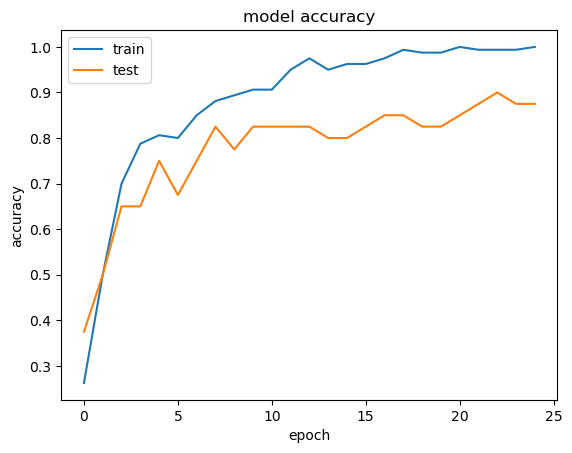

In [85]:
#Plot model accuracy over ephocs
plt.plot(cnn_results.history['accuracy'])
plt.plot(cnn_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [86]:
# Calculate pre-training accuracy 
score = CNN_model.evaluate(x_testcnn, y_test_lb, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy) 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8646 - loss: 0.8943
Pre-training accuracy: 87.5000%


In [87]:
# Evaluating the model on the training and testing set
score = CNN_model.evaluate(x_traincnn, y_train_lb, verbose=0)
print("Training Accuracy: ", score[1])

score = CNN_model.evaluate(x_testcnn, y_test_lb, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  1.0
Testing Accuracy:  0.875


# Add Confusion Matrix

In [98]:
#Get predictions from model
# y_test_predictions = CNN_model.predict_classes(x_testcnn)
y_test_predictions = (CNN_model.predict(x_testcnn) > 0.5).astype("int32")

predict_y = CNN_model.predict(x_testcnn)
y_test_predictions = np.argmax(predict_y, axis = 1)

y_test_predictions

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  


array([0, 5, 2, 0, 2, 5, 2, 3, 7, 4, 2, 4, 3, 3, 0, 7, 0, 2, 5, 0, 1, 3,
       1, 4, 1, 3, 7, 1, 0, 2, 1, 0, 0, 7, 2, 6, 0, 2, 0, 6], dtype=int64)

In [96]:
y_test

58         angry
40         happy
34       disgust
102        angry
184      disgust
198      neutral
95       disgust
4          angry
29           sad
168        happy
171      disgust
18         happy
11         angry
89          fear
110        angry
118    surprised
159        angry
35       disgust
136      neutral
59         angry
51          calm
16          fear
44       neutral
94         happy
31          calm
162         fear
38     surprised
28          calm
193        angry
27       disgust
47          calm
165        angry
194        angry
177    surprised
176      disgust
97           sad
174        angry
73       disgust
69         angry
172          sad
Name: emotion, dtype: object

In [97]:
#Get labels for emotions
y_labels_encoded

{0: 'angry',
 1: 'calm',
 2: 'disgust',
 3: 'fear',
 4: 'happy',
 5: 'neutral',
 6: 'sad',
 7: 'surprised'}

In [101]:
# Change predictions to emotions in order to compare
y_test_predictions_labels =[]

#Go through each prediction and append to new list
for e in range(len(y_test_predictions)):
    # print(y_test_predictions[e])
    y_test_predictions_labels.append(y_labels_encoded[y_test_predictions[e]])
    
#Build array of predictions
y_test_predictions_labels = np.array(y_test_predictions_labels)
y_test_predictions_labels

array(['angry', 'neutral', 'disgust', 'angry', 'disgust', 'neutral',
       'disgust', 'fear', 'surprised', 'happy', 'disgust', 'happy',
       'fear', 'fear', 'angry', 'surprised', 'angry', 'disgust',
       'neutral', 'angry', 'calm', 'fear', 'calm', 'happy', 'calm',
       'fear', 'surprised', 'calm', 'angry', 'disgust', 'calm', 'angry',
       'angry', 'surprised', 'disgust', 'sad', 'angry', 'disgust',
       'angry', 'sad'], dtype='<U9')

In [102]:
from sklearn.metrics import confusion_matrix

#Build confusion matrix and see results
confusion_matrix = confusion_matrix(y_test, y_test_predictions_labels)
confusion_matrix

array([[10,  0,  0,  2,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  8,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  3,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  1,  0,  0],
       [ 0,  1,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  3]], dtype=int64)

In [103]:
#See confusion matrix shape
confusion_matrix.shape

(8, 8)

In [104]:
#Turn al correct answers into 0 to visualize errors better
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        if i == j:
            confusion_matrix[i,j] = 0

# See results
confusion_matrix

array([[0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [105]:
#Add labels to confusion matrix
confusion_matrix = pd.DataFrame(confusion_matrix, columns=list(y_labels_encoded.values()), index=list(y_labels_encoded.values()))

print("The rows represents the true values or observations")
print("The columns respresent the model's predictions")

#Print confusion matrix results
confusion_matrix

The rows represents the true values or observations
The columns respresent the model's predictions


,angry,calm,disgust,fear,happy,neutral,sad,surprised
angry,0,0,0,2,0,0,0,0
calm,0,0,0,0,0,0,0,0
disgust,0,0,0,0,0,0,0,0
fear,0,0,0,0,0,0,0,0
happy,0,0,0,0,0,1,0,0
neutral,0,1,0,0,0,0,0,0
sad,0,0,0,0,0,0,0,1
surprised,0,0,0,0,0,0,0,0


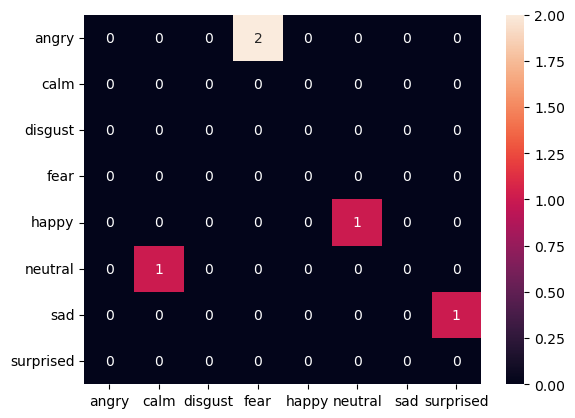

In [106]:
#Plot confusion matrix with results
ax = sns.heatmap(confusion_matrix, annot=True)

# Save CNN Model

In [108]:
from keras.models import model_from_json
# serialize model to json
json_model = CNN_model.to_json()
#save the model architecture to JSON file
with open('capstone_project_emotion_detection_final_version.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
CNN_model.save_weights('capstone_project_emotion_detection_final_version.weights.h5')
#Model loss and accuracy
print("Saved model to disk")

Saved model to disk


In [109]:
# load json and create model
json_file = open('capstone_project_emotion_detection_final_version.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("capstone_project_emotion_detection_final_version.weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [110]:
from keras.initializers import glorot_uniform
#Reading the model from JSON file
with open('capstone_project_emotion_detection_final_version.json', 'r') as json_file:
    json_savedModel= json_file.read()
#load the model architecture 
model_load = keras.models.model_from_json(json_savedModel)
model_load.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 40, 16)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 40, 32)         │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 40, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 40, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 40, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5120)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       655,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,155,034 (8.22 MB)

 Trainable params: 718,344 (2.74 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,436,690 (5.48 MB)